<hr>

## Tune Parameters: Window Size and Coefficient Ratio (p) Threshold

<hr>

### Read File

In [1]:
file = 'trajectories-examples/LA_Time_Lapse_23.06.2021_12_57_25_Exp3_51ms_p2_Tracks.xml'
min_track_len = 30

from bkg_func import main, utils, conf_ratio_func
all_tracks, frame_rate, n_tracks = main.ReadTracks(file, minlen = min_track_len)

161 tracks (filter = 30 frames)


### Track Selection

track with 110 steps


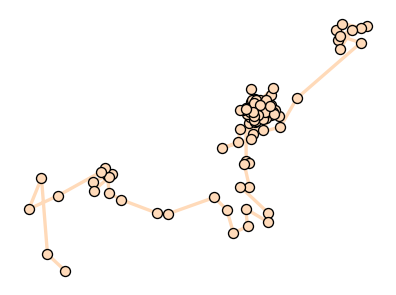

In [43]:
i = 73

track = utils.SingleTrack(all_tracks, i)
utils.plotSingleTrack(track)

### Tune Confinement Ratio and Rolling Window Size

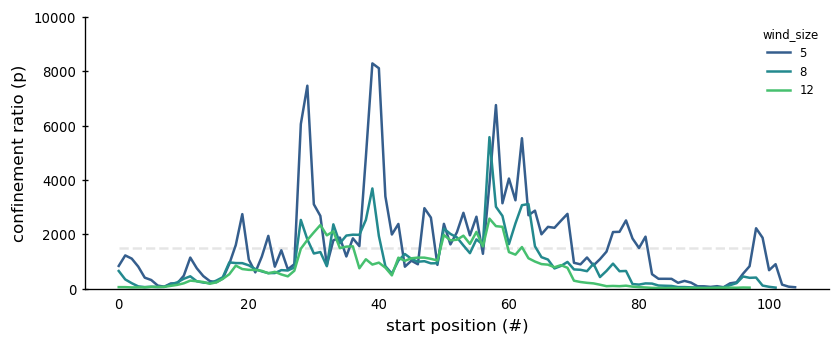

In [52]:
windows = [5, 8, 12]
p_thres = 1500

#conf_ratios = conf_ratio_func.TuneConfinementThreshold(track, frame_rate, conf_thres = p_thres, windows = windows)
conf_ratio_func.PlotParameterTunnig(conf_ratios, thres = p_thres, ylim = 10000)

### Inspect Confined Region

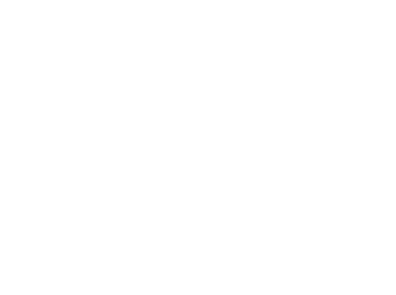

In [45]:
start_point = 125
end_point = 200

utils.plotSingleTrack(track, start = start_point, end = end_point)

## Subtrajectory Classification overview

track with 110 steps
time threshold: 10.0 frames ~ 0.5s
1 confined events; avg lifetime = 0.663s; avg cage_area = 3.58 nm2


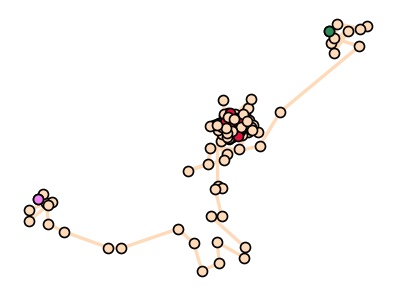

In [54]:
trackID = 73
p_thres = 1500
t_thres = 0.5
window = 5

track_score, stats = main.TrajectoryClassification(all_tracks, trackID, p_thres, window, frame_rate, t_thres)

<hr>